In [1]:
from TrafficLight import PeriodicTrafficLight
import Model1
import Model2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [2]:
periodic_ew = PeriodicTrafficLight()
periodic_ew.initialize(period=10, time_delay=0)

periodic_ns = PeriodicTrafficLight()
periodic_ns.initialize(period=10, time_delay=5)

In [3]:
intersection_system = Model1.IntersectionNetworkSimulator()
intersection_system.initialize(grid_dimensions=(1,1))
intersection_system.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, avg_arrival_time_n=3, avg_arrival_time_e=4)
intersection_system.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=periodic_ns, traffic_light_ew=periodic_ew)
intersection_system.set_observable_intersections(grid_inds=intersection_system.grid_inds)

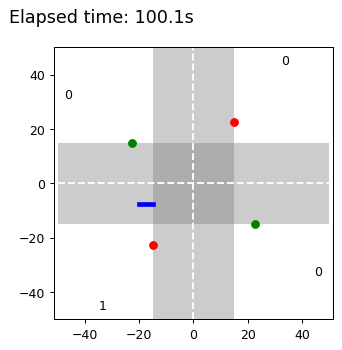

In [4]:
intersection_system.simulate(delta_t=0.1, end_time=100, animate=True, fig_width=4, file_name="figs/simulation_1x1.mp4", speed=2)

In [5]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="figs/simulation_1x1.mp4" type="video/mp4">
</video></div>""")

In [6]:
stats = intersection_system.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")
print("Average queue length: ", stats[(0,0)]["N"]["avg_queue_length"], "vehicles")

Average wait time: 1.1599999999999995 s
Average queue length:  0.9760239760239761 vehicles


In [7]:
stats = intersection_system.get_stats()
print("Average wait time:", stats[(0,0)]["E"]["wait_time"], "s")
print("Average queue length: ", stats[(0,0)]["E"]["avg_queue_length"], "vehicles")

Average wait time: 1.6952380952380939 s
Average queue length:  0.6873126873126874 vehicles


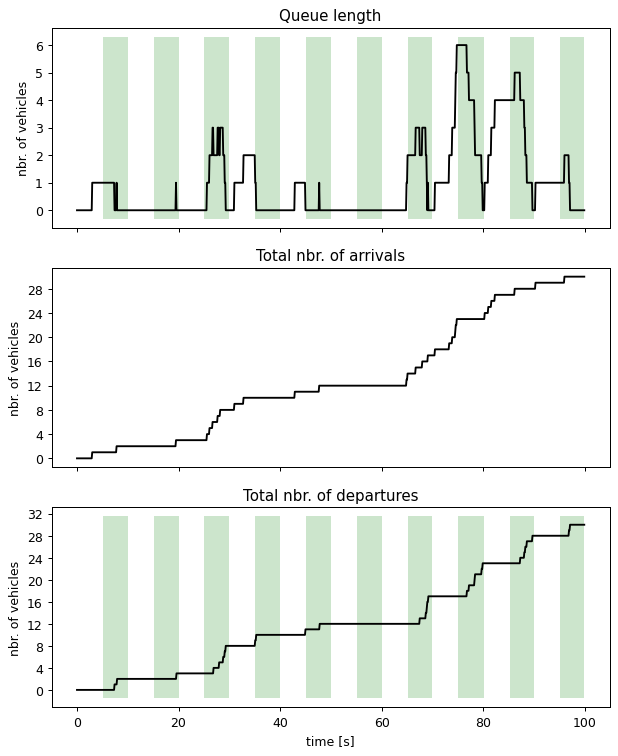

In [8]:
fig, axs = intersection_system.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='N', end_time=100, delta_t=0.1, traffic_light=periodic_ns,fig_size=(8,10))
#plt.savefig('figs/northbound_(0,0)', bbox_inches='tight')